In [1]:
from collections import deque
from functools import reduce
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

# Huffman Code

Inn this assignment we will implement a Huffman code. The binary code should be assigned such that the most frequent characters get the shortest codes and the least frequent characters get the longest codes. <br>
The Huffman code is a prefix code, which means that no code is a prefix of another code.<br>
The code will then be tested on the same Shakespeare text used in `assiment_1`.

In [2]:
class codeword:
    def __init__(self, probabiliy):
        #self.parents_queue = parents_queue
        self.probability = probabiliy
        self.name = None
        #self.children = []
        #self.parent = None
        #self.binary = None
        

    #def append_binary(self, bit):
     #   self.code = bit + self.code

    #def append_iterative_children(self, children):
     #   self.children.append(children)
      #  if type(children) == 


    


In [3]:
def build_tree(probabilities, separator = '-'):
    '''
    Build a Huffman Code from a dictionary of probabilities
    '''

    
    
    
    
    assert np.isclose(sum(probabilities.values()), 1), 'Probabilities must sum to 1'

    assert all([p >= 0 for p in probabilities.values()]), 'Probabilities must be non-negative'

    assert type(probabilities) == dict, 'Probabilities must be a dictionary'

    assert type(separator) == str, 'Separator must be a string'


    #Sorting the probabilities dictionary
    probabilities = dict(sorted(probabilities.items(), key=lambda x: x[1], reverse=True))

    height_dict = {k: i + 1 for i, k in enumerate(probabilities.keys())}

    parents = deque(probabilities.keys())

    updating_probabilities = probabilities.copy()

    codes = {k: '' for k in parents}

    all_parents = {}

    tree = ''

    

    j = 1
    while len(parents) > 1:
        # Sort parents by probability
        parents = deque(sorted(parents, key=lambda x: -updating_probabilities[x]))

        # Get the two parents with the lowest probability
        children1 = parents.pop()
        children2 = parents.pop()

        # Create a new parent with the sum of the probabilities
        new_parent = codeword(updating_probabilities[children1] + updating_probabilities[children2])
        new_parent.name = children1 + separator + children2
        new_parent.probability = updating_probabilities[children1] + updating_probabilities[children2]

        #height_dict[new_parent.name] = (height_dict[children1] + height_dict[children2])/2

        splitted_children1 = children1.split(separator)
        splitted_children2 = children2.split(separator)
        
        #print(splitted_children2)
        children_1_order = reduce(lambda x, y: x + height_dict[y], splitted_children1, 0)
        children_2_order = reduce(lambda x, y: x + height_dict[y], splitted_children2, 0)

        if children_1_order < children_2_order:
            bin_1 = '1'
            bin_2 = '0'
        else:
            bin_1 = '0'
            bin_2 = '1'
        
        #print(splitted_children1, '1', bin_1)
        #print(splitted_children2, '2', bin_2)
        for child in splitted_children1:
            codes[child] += bin_1

        for child in splitted_children2:
            codes[child] += bin_2

        # Append the parents as children to the new parent
        parents.append(new_parent.name)
        
        updating_probabilities[new_parent.name] = new_parent.probability

        all_parents[str(j)] = new_parent.name

        j += 1

        tree += new_parent.name + ' '
    

    codes = {k: codes[k][::-1] for k in codes}

    return tree, all_parents, codes
        
        

## First exmaple

In the following, before applying our function to Shakespeare's text we will focus on a simple example using the $PMF$ used in the previous assigment.

In [4]:
outcomes_prob_dict = {'x1': 1/4, 'x2': 1/4, 'x3': 1/4, 'x4': 3/16, 'x5': 1/64, 'x6': 1/64, 'x7': 1/64, 'x8': 1/64}


In [5]:
tree, all_parents, codes = build_tree(outcomes_prob_dict)


In [6]:
pprint(codes)

{'x1': '11',
 'x2': '10',
 'x3': '01',
 'x4': '001',
 'x5': '00011',
 'x6': '00010',
 'x7': '00001',
 'x8': '00000'}


### Testing on Shakespeare text

In [7]:
with open('../../tempest.txt', mode = 'r') as f:
    text = f.read()

text = text.lower() # convert to lowercase

unique_characters = list(set(text)) # get unique characters

probabilities = {c: text.count(c)/len(text) for c in unique_characters} # get the probability distribution

print('Is > a valid separator? ', not '>' in unique_characters)

tree, all_parents, codes = build_tree(probabilities, separator = '>')


Is > a valid separator?  True


In [8]:
pprint(codes)

{'\n': '01101',
 ' ': '11',
 '!': '000000001',
 '&': '0000000000000',
 "'": '01000000',
 ',': '001011',
 '-': '000000011',
 '.': '0000001',
 ':': '000000010',
 ';': '10000001',
 '?': '100000001',
 '[': '000000000001',
 ']': '0000000000001',
 'a': '1001',
 'b': '100001',
 'c': '001010',
 'd': '10001',
 'e': '0111',
 'f': '001001',
 'g': '0100001',
 'h': '01001',
 'i': '1011',
 'j': '1000000000',
 'k': '1000001',
 'l': '00001',
 'm': '011001',
 'n': '1010',
 'o': '0011',
 'p': '001000',
 'q': '00000000001',
 'r': '01010',
 's': '01011',
 't': '0001',
 'u': '010001',
 'v': '01000001',
 'w': '011000',
 'x': '1000000001',
 'y': '000001',
 'z': '0000000001'}


In [20]:
ordered_prob = dict(sorted(probabilities.items(), key=lambda x: x[0], reverse=False))



In [10]:
ordered_codes = dict(sorted(codes.items(), key=lambda x: x[0], reverse=False))


In [11]:
len_codes = {k: len(codes[k]) for k in codes}

In [28]:
print(f'The average length returned is {np.sum(np.array([len_codes[k] * probabilities[k] for k in probabilities])):.2f}')

The average length returned is 4.26


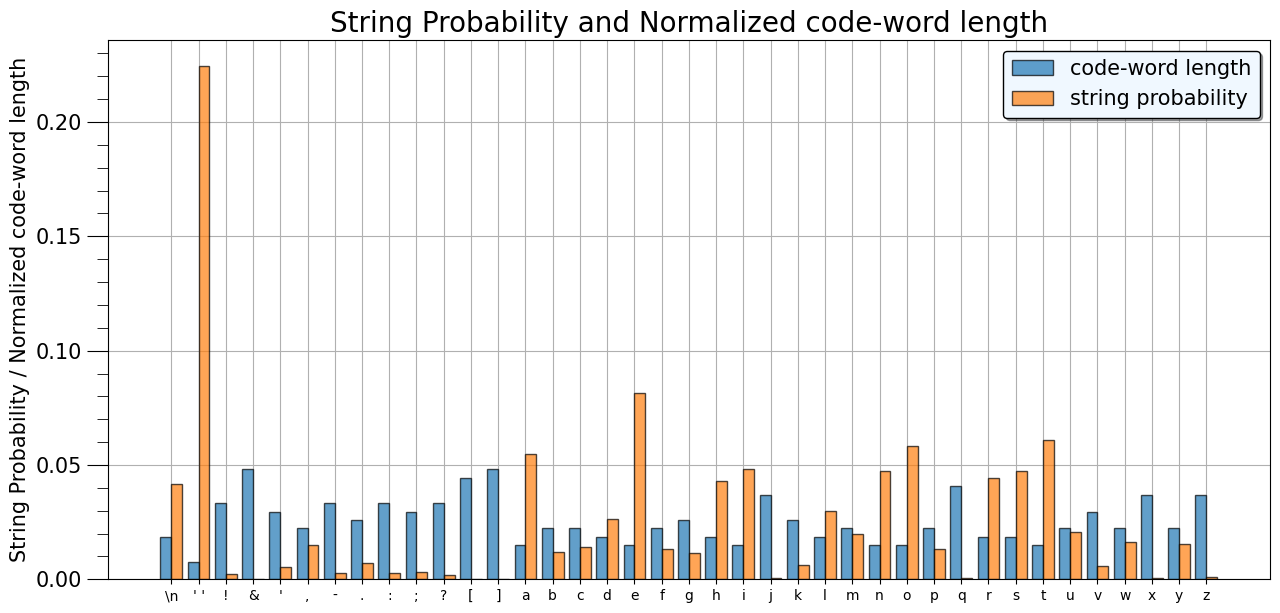

In [13]:
len_codes_dict = {k: len(v) for k, v in ordered_codes.items()}
fig, ax = plt.subplots(1, 1, figsize = (15,7))
width = 0.4
ax.bar(np.arange(len(ordered_codes)), np.array(list(len_codes_dict.values()))/np.sum(list(len_codes.values())), width =width, edgecolor = 'black', alpha=0.7, zorder = 2,\
    label = 'code-word length')

ax.bar(np.arange(len(ordered_prob)) + width, np.array(list(ordered_prob.values())), width =width, edgecolor = 'black', alpha=0.7, zorder = 2,\
    label = 'string probability')
#ax.bar(np.arange(len(ordered_prob)) + width, np.array(list(ordered_prob.values())), width = width, edgecolor = 'black', alpha=0.7, zorder = 2, orientation = 'horizontal',\
    #label = 'string probability 

x_ticks_label = list(ordered_prob.keys())
x_ticks_label = list(map(lambda x: x.replace(' ', '\' \''), x_ticks_label))
x_ticks_label = list(map(lambda x: x.replace('\n', '\\n'), x_ticks_label))
ax.set_xticks(np.arange(len(ordered_prob)) + width/2)
ax.set_xticklabels(x_ticks_label, rotation = 0)
ax.tick_params(axis='y', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
ax.tick_params(axis='x', which='minor', labelsize=0, length=0)
ax.minorticks_on()
ax.grid(zorder = 1)
ax.set_ylabel('String Probability / Normalized code-word length', fontsize = 15)
ax.legend(facecolor = 'aliceblue', fontsize = 15, shadow = True, edgecolor = 'black')
ax.set_title('String Probability and Normalized code-word length', fontsize = 20)
plt.show()

## Discussion of the results

We can see that the most frequent characters get the shortest codes and the least frequent characters get the longest codes that is what we wanted and what Huffman codes predicates. <br>